In [50]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [51]:
train_data_dir = 'C:/Users/charitha/Downloads/Dataset2/Dataset2/FNA'
test_data_dir = 'C:/Users/charitha/Downloads/Dataset2/Dataset2/test'

In [52]:
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)  # Assuming color images (RGB)
img_size=(img_width, img_height)
batch_size = 32
epochs = 10

In [53]:
# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [54]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',  # Assuming binary classification (benign or malignant)
    subset='training'
)

Found 1380 images belonging to 2 classes.


In [55]:
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 344 images belonging to 2 classes.


In [56]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10


43/43 [==============================] - 17s 377ms/step - loss: 0.7441 - accuracy: 0.7307 - val_loss: 0.7233 - val_accuracy: 0.6562
Epoch 2/10
43/43 [==============================] - 17s 385ms/step - loss: 0.3046 - accuracy: 0.8939 - val_loss: 0.5757 - val_accuracy: 0.7969
Epoch 3/10
43/43 [==============================] - 14s 331ms/step - loss: 0.2959 - accuracy: 0.9028 - val_loss: 0.5098 - val_accuracy: 0.7969
Epoch 4/10
43/43 [==============================] - 14s 331ms/step - loss: 0.2491 - accuracy: 0.9102 - val_loss: 0.5662 - val_accuracy: 0.7281
Epoch 5/10
43/43 [==============================] - 17s 405ms/step - loss: 0.2333 - accuracy: 0.9169 - val_loss: 0.5221 - val_accuracy: 0.8281
Epoch 6/10
43/43 [==============================] - 18s 412ms/step - loss: 0.2223 - accuracy: 0.9125 - val_loss: 0.4854 - val_accuracy: 0.7719
Epoch 7/10
43/43 [==============================] - 17s 404ms/step - loss: 0.2010 - accuracy: 0.9251 - val_loss: 0.5113 - val_accuracy: 0.7375
Epoch 8/10

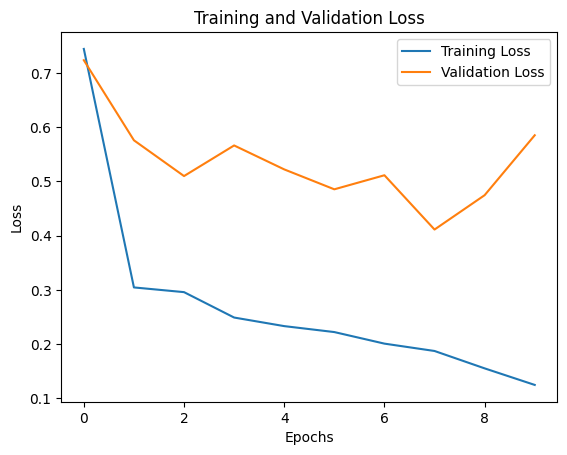

In [58]:
# Plot training and validation loss and accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

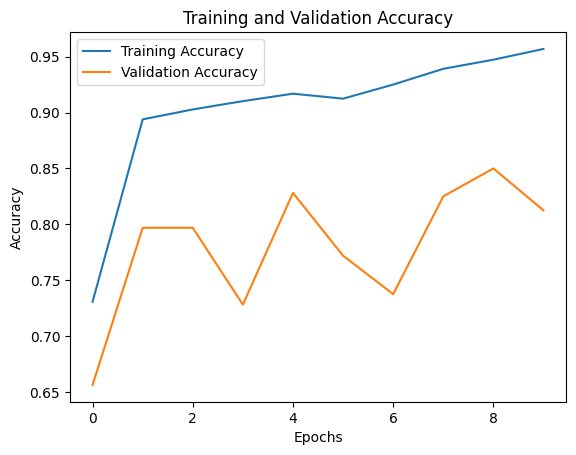

In [59]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [60]:
import pandas as pd
test_df = pd.DataFrame({
    test_data_dir
})
samples = test_df.shape[0]

In [67]:
test_filenames = os.listdir("C:/Users/charitha/Downloads/Dataset2/__MACOSX/Dataset2/test")
test_df = pd.DataFrame({'filename': os.listdir(test_data_dir)})
samples = test_df.shape[0]

In [68]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=test_data_dir, 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

Found 14 validated image filenames.


In [71]:
if test_generator.n > 0:
    # Predictions
    predictions = model.predict(test_generator, steps=np.ceil(test_generator.n/batch_size))
    
    # Assuming predictions close to 0 are benign and close to 1 are malignant
    predicted_labels = np.round(predictions)
    
    # Print the predicted labels
    print(predicted_labels)
else:
    print("No valid images for predictions.")

1/1 [==============================] - 0s 104ms/step
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]]
